<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams             
from bs4 import BeautifulSoup  
from matplotlib import cm


#setting up plotting options

%matplotlib inline
%reload_ext autoreload
%autoreload 2

rcParams['figure.figsize'] = 14,8
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
plt.style.use('seaborn-white')
sns.set_style('white')
sns.set_context('paper', font_scale=1.5)
palette = sns.color_palette("Greens")

#display options for Pandas

pd.set_option('max_columns', 20)
pd.set_option('max_rows', 20)

In [2]:
usdanutrition = pd.read_csv('USDAfoodnutrition.csv')
usdanutritioncategory = pd.read_csv('USDAfoodnutritioncategory.csv')
usdanutritioncategorycrosstab = pd.read_csv('USDAfoodnutritioncategorycrosstab.csv')
usdanutritionhighscore = pd.read_csv('USDAfoodnutritionhighscore.csv')
usdanutritionhighscorecrosstab = pd.read_csv('USDAfoodnutritionhighscorecrosstab.csv')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 <a list of 14 Text xticklabel objects>)

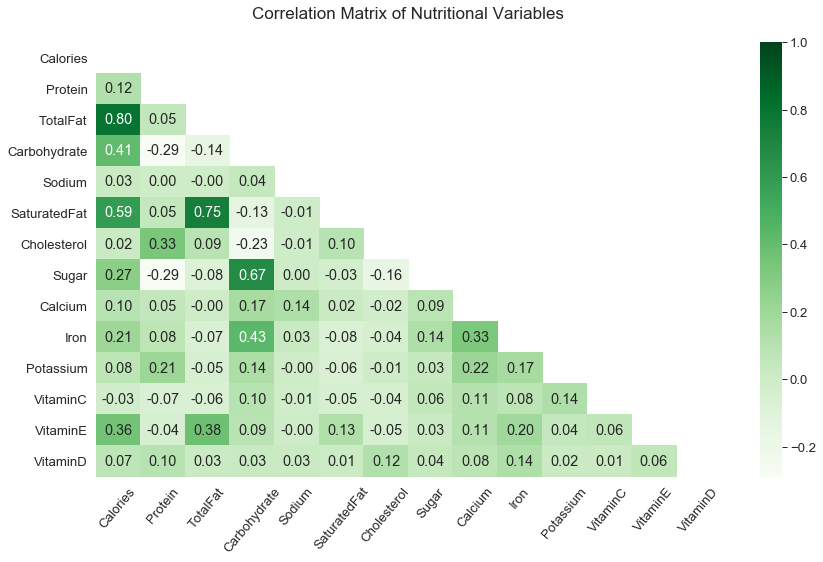

In [18]:
usdanutritionforcorr = usdanutrition.drop(columns=[ 'HighCalories', 
                                                    'HighProtein', 
                                                    'HighTotalFat', 
                                                    'HighCarbohydrate', 
                                                    'HighSodium', 
                                                    'HighSaturatedFat', 
                                                    'HighCholesterol', 
                                                    'HighSugar', 
                                                    'HighVitaminC', 
                                                    'HighVitaminD', 
                                                    'HighVitaminE', 
                                                    'HighCalcium',
                                                    'HighIron',
                                                    'HighPotassium',
                                                    'ID'])
usdanutritioncorr = usdanutritionforcorr.corr()


#cutting out redundant values from upper right triangle in heatmap

mask = np.zeros_like(usdanutritioncorr)
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True

#plotting into heatmap

sns.heatmap(usdanutritioncorr, cmap="Greens", mask=mask, annot=True, fmt='.2f')
plt.title("Correlation Matrix of Nutritional Variables\n", size=17)
plt.xticks(rotation=50)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 <a list of 14 Text xticklabel objects>)

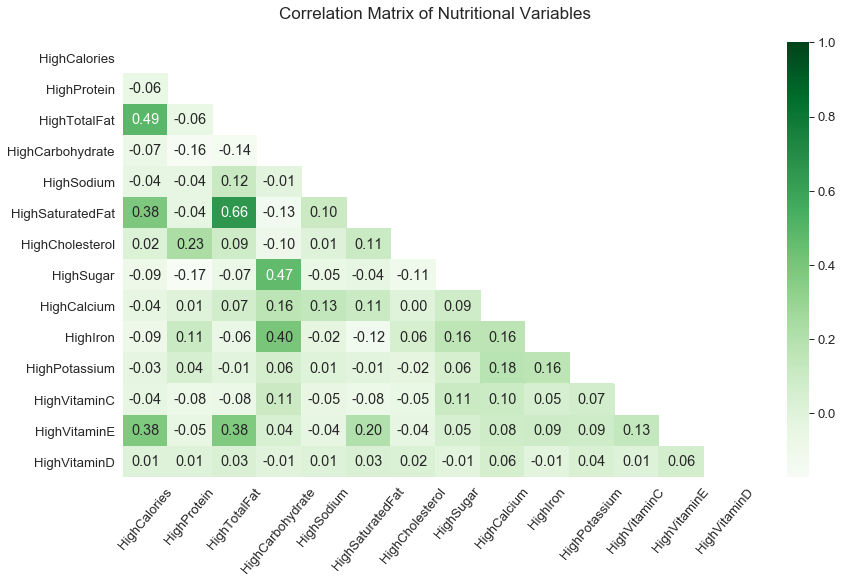

In [20]:
usdanutritionhsforcorr = usdanutrition.drop(columns=[ 'Calories', 
                                                    'Protein', 
                                                    'TotalFat', 
                                                    'Carbohydrate', 
                                                    'Sodium', 
                                                    'SaturatedFat', 
                                                    'Cholesterol', 
                                                    'Sugar', 
                                                    'VitaminC', 
                                                    'VitaminD', 
                                                    'VitaminE', 
                                                    'Calcium',
                                                    'Iron',
                                                    'Potassium',
                                                    'ID'])
usdanutritionhscorr = usdanutritionhsforcorr.corr()


#cutting out redundant values from upper right triangle in heatmap

mask = np.zeros_like(usdanutritionhscorr)
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True

#plotting into heatmap

sns.heatmap(usdanutritionhscorr, cmap="Greens", mask=mask, annot=True, fmt='.2f')
plt.title("Correlation Matrix of Nutritional Variables\n", size=17)
plt.xticks(rotation=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011D67CD2308>,
      dtype=object)

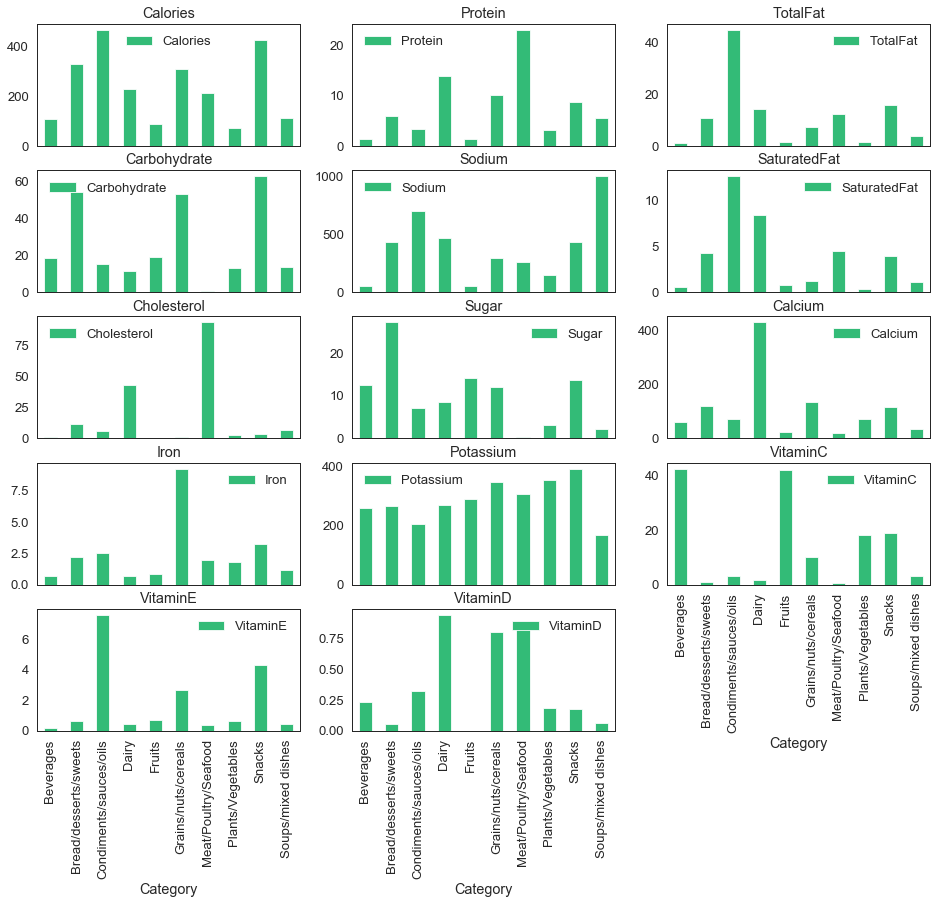

In [22]:
usdanutritioncategorycrosstab.plot(kind="bar", subplots=True, 
                                   x="Category", sharey=False,
                                   layout=(5,3), color="#33bb77", figsize=(16,13))